In [176]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(rc={"figure.figsize": (6, 4)})
%matplotlib inline

    Import cleaned grit data

In [177]:
df_400 = pd.read_excel(r"C:\Users\L7927301\Documents\Projects\Statistics_BA\Density_Measurements.xlsx", sheet_name=0)
df_500 = pd.read_excel(r"C:\Users\L7927301\Documents\Projects\Statistics_BA\Density_Measurements.xlsx", sheet_name=1)
df_800 = pd.read_excel(r"C:\Users\L7927301\Documents\Projects\Statistics_BA\Density_Measurements.xlsx", sheet_name=2)
df_pl = pd.read_excel(r"C:\Users\L7927301\Documents\Projects\Statistics_BA\Density_Measurements.xlsx", sheet_name=3)

In [178]:
list(df_400)

['Sample #',
 'Trial',
 'dry (g)',
 'suspended (g)',
 'saturated (g)',
 'density (g/cc)',
 'open pore volume',
 'open porosity (%)',
 'dry (g).1',
 'suspended (g).1',
 'saturated (g).1',
 'density (g/cc).1',
 'open pore volume.1',
 'open porosity (%).1',
 'Increase in weight (%)',
 'Increase in Density (%)',
 'Wt % Sulfur']

In [179]:
# Rename specific column names for untreated and treated
df_list = [df_400, df_500, df_800, df_pl]

for dfs in df_list:
    dfs.rename(columns = {'dry (g)':'dry (g)-untreated',
                         'suspended (g)':'suspended (g)-untreated',
                         'saturated (g)':'saturated (g)-untreated',
                         'density (g/cc)':'density (g/cc)-untreated',
                         'open pore volume':'open pore volume-untreated',
                         'open porosity (%)':'open porosity (%)-untreated',
                         'dry (g).1':'dry (g)-treated',
                         'suspended (g).1':'suspended (g)-treated',
                         'saturated (g).1':'saturated (g)-treated',
                         'density (g/cc).1':'density (g/cc)-treated',
                         'open pore volume.1':'open pore volume-treated',
                         'open porosity (%).1':'open porosity (%)-treated'

                         }, inplace = True)

In [180]:
df_400['Test'] = 'R&D'
df_500['Test'] = 'R&D'
df_800['Test'] = 'R&D'
df_pl['Test'] = 'Plant'

In [181]:
df_400_pl = df_pl.loc[df_pl['Sample #'].str.startswith('4')]
df_500_pl = df_pl.loc[df_pl['Sample #'].str.startswith('5')]
df_800_pl = df_pl.loc[df_pl['Sample #'].str.startswith('8')]

In [182]:
df_4 = pd.concat([df_400, df_400_pl], axis=0)
df_5 = pd.concat([df_500, df_500_pl], axis=0)
df_8 = pd.concat([df_800, df_800_pl], axis=0)

In [183]:
df_5.dtypes

Sample #                        object
Trial                           object
dry (g)-untreated              float64
suspended (g)-untreated        float64
saturated (g)-untreated        float64
density (g/cc)-untreated       float64
open pore volume-untreated     float64
open porosity (%)-untreated    float64
dry (g)-treated                float64
suspended (g)-treated          float64
saturated (g)-treated          float64
density (g/cc)-treated         float64
open pore volume-treated       float64
open porosity (%)-treated      float64
Increase in weight (%)         float64
Increase in Density (%)        float64
Wt % Sulfur                    float64
Test                            object
dtype: object

    Test for variance and sample differences

In [184]:
print(df_400['Wt % Sulfur'].var(), df_400['Wt % Sulfur'].mean(), df_400['Wt % Sulfur'].std())
print(df_400_pl['Wt % Sulfur'].var(), df_400_pl['Wt % Sulfur'].mean(), df_400_pl['Wt % Sulfur'].std())

0.00018016823376928437 0.3866040412391684 0.013422676103120583
0.0006271711413658917 0.3576926481421037 0.025043385181837772


In [185]:
print(df_500['Wt % Sulfur'].var(), df_500['Wt % Sulfur'].mean(), df_500['Wt % Sulfur'].std())
print(df_500_pl['Wt % Sulfur'].var(), df_500_pl['Wt % Sulfur'].mean(), df_500_pl['Wt % Sulfur'].std())

0.00047692270811416476 0.37029969948217295 0.02183856011998421
1.3126012536358693e-05 0.37599078791677376 0.0036229839271460606


In [186]:
print(df_800['Wt % Sulfur'].var(), df_800['Wt % Sulfur'].mean(), df_800['Wt % Sulfur'].std())
print(df_800_pl['Wt % Sulfur'].var(), df_800_pl['Wt % Sulfur'].mean(), df_800_pl['Wt % Sulfur'].std())

0.00010210460171003723 0.39301659582624143 0.010104682167690246
0.00024984611065130254 0.3919568993362452 0.015806521143227645


In [187]:
print(stats.levene(df_400['Wt % Sulfur'],
             df_400_pl['Wt % Sulfur'],
             center= 'median'))

print(stats.levene(df_500['Wt % Sulfur'],
             df_500_pl['Wt % Sulfur'],
             center= 'median'))

print(stats.levene(df_800['Wt % Sulfur'],
             df_800_pl['Wt % Sulfur'],
             center= 'median'))           

LeveneResult(statistic=6.110316705133453, pvalue=0.02030536562322485)
LeveneResult(statistic=1.4460046965721327, pvalue=0.23560148798001054)
LeveneResult(statistic=5.495461024767465, pvalue=0.047102889651316725)


    Variances are not homogenous for 400 and 800 grit sizes

    Run a T-test for all combinations 

In [188]:
'''
Perform independent two sample t-test

'''
print('400 grit: R&D vs Plant": %.4f' %  ttest_ind(df_400['Wt % Sulfur'], df_400_pl['Wt % Sulfur'],equal_var=False)[1])
print('500 grit: R&D vs Plant": %.4f' %  ttest_ind(df_500['Wt % Sulfur'], df_500_pl['Wt % Sulfur'],equal_var=True)[1])
print('800 grit: R&D vs Plant": %.4f' %  ttest_ind(df_800['Wt % Sulfur'], df_800_pl['Wt % Sulfur'],equal_var=False)[1])

print("-----------------------")
print('400 grit vs 500 grit: R&D": %.4f' %  ttest_ind(df_400['Wt % Sulfur'], df_500['Wt % Sulfur'],equal_var=False)[1])
print('400 grit vs 800 grit: R&D": %.4f' %  ttest_ind(df_400['Wt % Sulfur'], df_800['Wt % Sulfur'],equal_var=False)[1])
print('500 grit vs 800 grit: R&D": %.4f' %  ttest_ind(df_800['Wt % Sulfur'], df_500['Wt % Sulfur'],equal_var=False)[1])

print("-----------------------")
print('400 grit vs 500 grit: Plant": %.4f' %  ttest_ind(df_400_pl['Wt % Sulfur'], df_500_pl['Wt % Sulfur'],equal_var=False)[1])
print('400 grit vs 800 grit: Plant": %.4f' %  ttest_ind(df_400_pl['Wt % Sulfur'], df_800_pl['Wt % Sulfur'],equal_var=True)[1])
print('500 grit vs 800 grit: Plant": %.4f' %  ttest_ind(df_500_pl['Wt % Sulfur'], df_800_pl['Wt % Sulfur'],equal_var=False)[1])

400 grit: R&D vs Plant": 0.1015
500 grit: R&D vs Plant": 0.6089
800 grit: R&D vs Plant": 0.9103
-----------------------
400 grit vs 500 grit: R&D": 0.0004
400 grit vs 800 grit: R&D": 0.2246
500 grit vs 800 grit: R&D": 0.0009
-----------------------
400 grit vs 500 grit: Plant": 0.2404
400 grit vs 800 grit: Plant": 0.0599
500 grit vs 800 grit: Plant": 0.1348


    Significant difference observed in 500 grit size for R&D

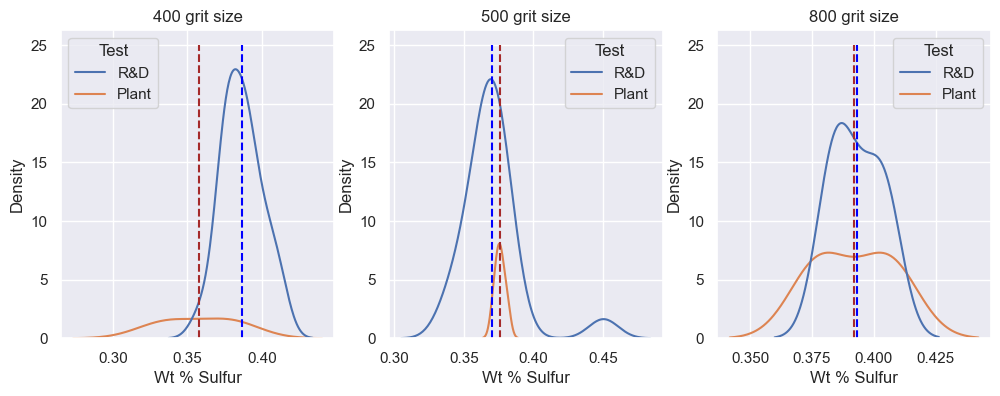

In [217]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

sns.kdeplot(data=df_4, x="Wt % Sulfur", hue="Test", ax=ax1)
ax1.vlines(x=df_400['Wt % Sulfur'].mean(),ymin=0,ymax=25,color='blue',linestyle='--')
ax1.vlines(x=df_400_pl['Wt % Sulfur'].mean(),ymin=0,ymax=25,color='brown',linestyle='--')
ax1.set_title('400 grit size')

sns.kdeplot(data=df_5, x="Wt % Sulfur", hue="Test", ax=ax2)
ax2.vlines(x=df_500['Wt % Sulfur'].mean(),ymin=0,ymax=25,color='blue',linestyle='--')
ax2.vlines(x=df_500_pl['Wt % Sulfur'].mean(),ymin=0,ymax=25,color='brown',linestyle='--')
ax2.set_title('500 grit size')

sns.kdeplot(data=df_8, x="Wt % Sulfur", hue="Test", ax=ax3)
ax3.vlines(x=df_800['Wt % Sulfur'].mean(),ymin=0,ymax=25,color='blue',linestyle='--')
ax3.vlines(x=df_800_pl['Wt % Sulfur'].mean(),ymin=0,ymax=25,color='brown',linestyle='--')
ax3.set_title('800 grit size')

plt.show()

In [190]:
df = pd.concat([df_4, df_8],axis=0)
df['Sample #'] = df['Sample #'].apply(lambda x: '400' if x.startswith('4') else x)
df['Sample #'] = df['Sample #'].apply(lambda x: '500' if x.startswith('5') else x)
df['Sample #'] = df['Sample #'].apply(lambda x: '800' if x.startswith('8') else x)

In [191]:
list(df)

['Sample #',
 'Trial',
 'dry (g)-untreated',
 'suspended (g)-untreated',
 'saturated (g)-untreated',
 'density (g/cc)-untreated',
 'open pore volume-untreated',
 'open porosity (%)-untreated',
 'dry (g)-treated',
 'suspended (g)-treated',
 'saturated (g)-treated',
 'density (g/cc)-treated',
 'open pore volume-treated',
 'open porosity (%)-treated',
 'Increase in weight (%)',
 'Increase in Density (%)',
 'Wt % Sulfur',
 'Test']

C:\Users\L7927301\AppData\Local\Temp\ipykernel_62896\4143727816.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

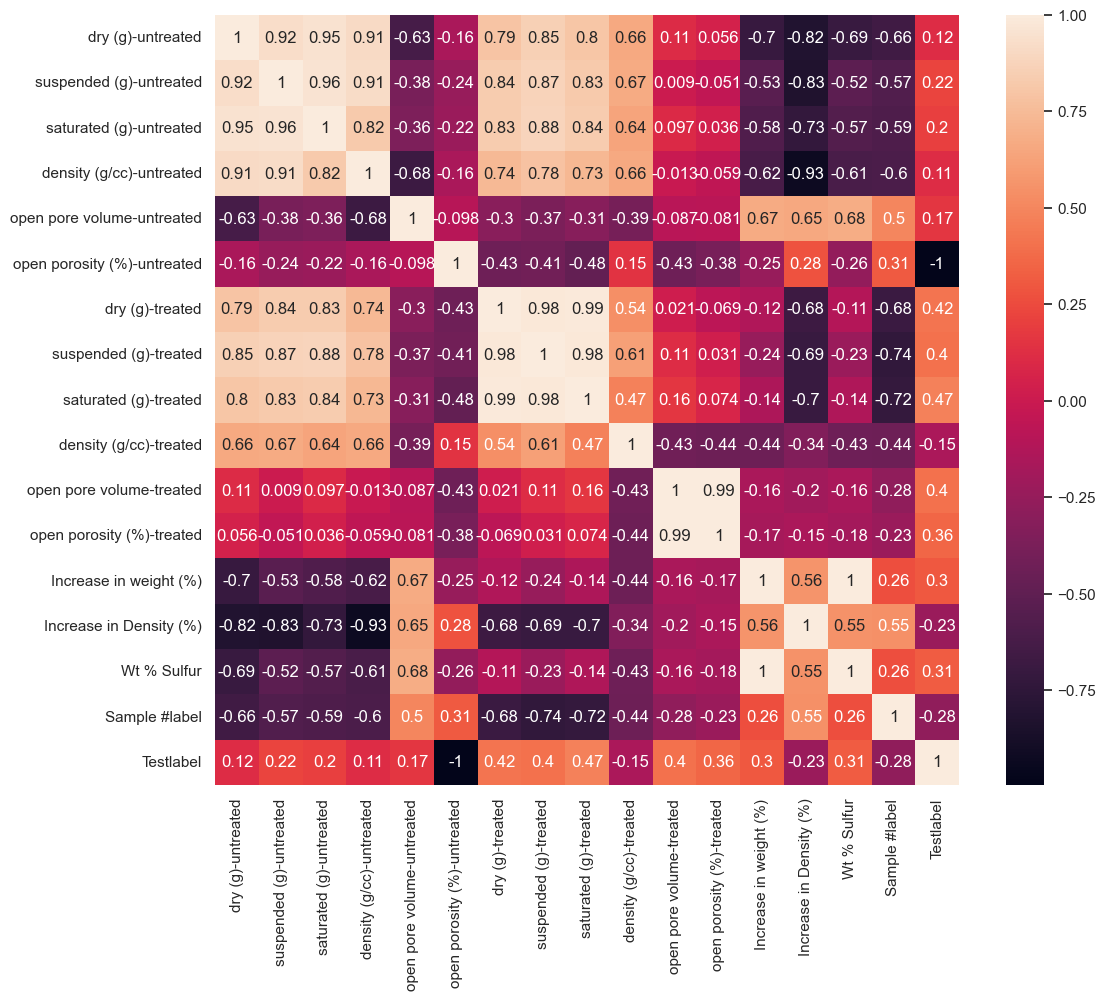

In [201]:
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(), annot=True)

    Identify drivers of sulphur weight

In [193]:
df.drop(columns=['Trial'], inplace = True)

obj_cols = df.select_dtypes(include=[object])

for i in obj_cols:
    df[i+'label'] = preprocessing.LabelEncoder().fit_transform(df[i])

In [194]:
list(df)

['Sample #',
 'dry (g)-untreated',
 'suspended (g)-untreated',
 'saturated (g)-untreated',
 'density (g/cc)-untreated',
 'open pore volume-untreated',
 'open porosity (%)-untreated',
 'dry (g)-treated',
 'suspended (g)-treated',
 'saturated (g)-treated',
 'density (g/cc)-treated',
 'open pore volume-treated',
 'open porosity (%)-treated',
 'Increase in weight (%)',
 'Increase in Density (%)',
 'Wt % Sulfur',
 'Test',
 'Sample #label',
 'Testlabel']

In [195]:
X = df[['dry (g)-untreated',
 #'suspended (g)-untreated',
 #'saturated (g)-untreated',
 'density (g/cc)-untreated',
 'open pore volume-untreated',
 'open porosity (%)-untreated',
 'Sample #label',
 'Testlabel',
 'dry (g)-treated'
   ]]

Y = df['Wt % Sulfur']

In [196]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [197]:
result = sm.OLS(Y, X).fit()
 
# printing the summary table
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:            Wt % Sulfur   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.836e+04
Date:                Tue, 01 Nov 2022   Prob (F-statistic):                    3.13e-54
Time:                        12:14:59   Log-Likelihood:                          140.57
No. Observations:                  38   AIC:                                     -267.1
Df Residuals:                      31   BIC:                                     -255.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [218]:
print(result.params)

dry (g)-untreated             -0.178889
density (g/cc)-untreated       0.110688
open pore volume-untreated     0.124126
open porosity (%)-untreated    0.000919
Sample #label                  0.002493
Testlabel                      0.045071
dry (g)-treated                0.113216
dtype: float64


C:\Users\L7927301\AppData\Local\Temp\ipykernel_62896\3173568050.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


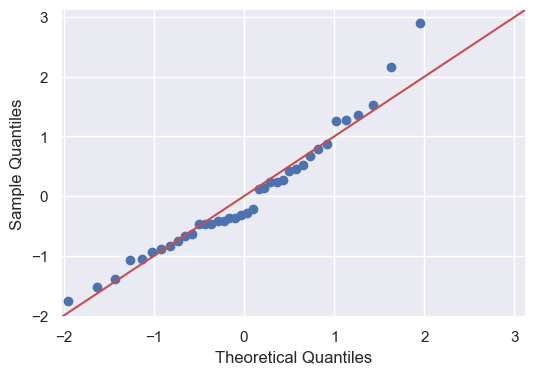

In [198]:
import scipy.stats as stats
residuals = result.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [199]:
forest_reg = RandomForestRegressor(random_state=42)

forest_reg.fit(x_train, y_train)
forest_reg.fit(x_train, y_train)

print('R squared train": %.4f' % forest_reg.score(x_train, y_train))
print('R squared test": %.4f' % forest_reg.score(x_test, y_test))

y_pred = forest_reg.predict(x_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

R squared train": 0.9098
R squared test": 0.3646
Random Forest RMSE: 0.0156


Text(0.5, 0, 'Random Forest Feature Importance')

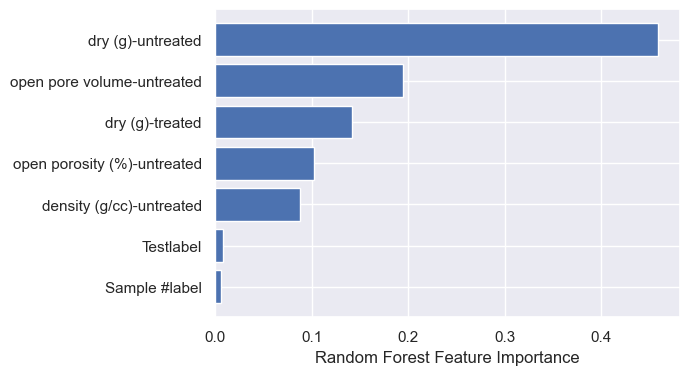

In [200]:
sorted_idx = forest_reg.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], forest_reg.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

    understanding sensitivity with salib

In [202]:
from SALib.analyze import morris
from SALib.sample.morris import sample
from SALib.test_functions import Sobol_G
from SALib.util import read_param_file
from SALib.plotting.morris import horizontal_bar_plot, covariance_plot,sample_histograms

In [211]:
problem = {
    'num_vars': 7,
    'names': ['dry (g)-untreated',
    'density (g/cc)-untreated',
    'open pore volume-untreated',
    'open porosity (%)-untreated',
    'Sample #label',
    'Testlabel',
    'dry (g)-treated'],

    'bounds': [[3, 5],
               [1.5, 1.8],
               [0.740000, 27.740000],
               [1,1.2],
               [0,1],
               [0,1],
               [48,57]
              ]
}
# Generate samples
param_values = sample(problem, N=1000, num_levels=4,
                      optimal_trajectories=None)
# Run model (example)
Y = forest_reg.predict(param_values)
# Perform analysis
Si = morris.analyze(problem, param_values, Y, conf_level=0.95,
                    print_to_console=True,
                    num_levels=4, num_resamples=100)

                                   mu   mu_star     sigma  mu_star_conf
dry (g)-untreated           -0.023933  0.023933  0.024538      0.001580
density (g/cc)-untreated    -0.001657  0.001723  0.001338      0.000078
open pore volume-untreated   0.007270  0.007270  0.007256      0.000410
open porosity (%)-untreated  0.000000  0.000000  0.000000      0.000000
Sample #label               -0.000716  0.000718  0.000538      0.000029
Testlabel                    0.001981  0.001981  0.000655      0.000041
dry (g)-treated              0.000000  0.000000  0.000000      0.000000


c:\Users\L7927301\Documents\Projects\Statistics_BA\Repo\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
